# Assignment

This assignment, we focus on **content-based recommenders**.

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

The data we use in this assignment is a movie meta-data that accompanies the user-movie rating data we used in the lecture. Let's take a look:

In [2]:
df_movies = pd.read_csv('./movies.csv')
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


Question 1. Do some exploratory analysis of the data.  Please do at least 3 different analysis.  1 analysis/data exploration should be a visualization of some sort (bar, histogram, boxplot, etc.).

In [3]:
#Data Exploration 1
print(df_movies.info())
print(df_movies.dtypes)
print(df_movies.describe())
#print(df_movies.value_counts())
print(df_movies.nunique())
print(df_movies.isna())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB
None
movieId     int64
title      object
genres     object
dtype: object
             movieId
count    9742.000000
mean    42200.353623
std     52160.494854
min         1.000000
25%      3248.250000
50%      7300.000000
75%     76232.000000
max    193609.000000
movieId    9742
title      9737
genres      951
dtype: int64
      movieId  title  genres
0       False  False   False
1       False  False   False
2       False  False   False
3       False  False   False
4       False  False   False
...       ...    ...     ...
9737    False  False   False
9738    False  False   False
9739    False  False   False
9740    False  False   False
9741    False  

In [4]:
#Data Exploration 2
df_movies_copy = df_movies.copy().drop(['movieId', 'title'], axis=1)
df_movies_copy.groupby('genres').value_counts()


,count
genres,
(no genres listed),34
Action,60
Action|Adventure,32
Action|Adventure|Animation,18
Action|Adventure|Animation|Children,6
...,...
Sci-Fi|Thriller,23
Sci-Fi|Thriller|IMAX,1
Thriller,84


<Axes: xlabel='genres'>

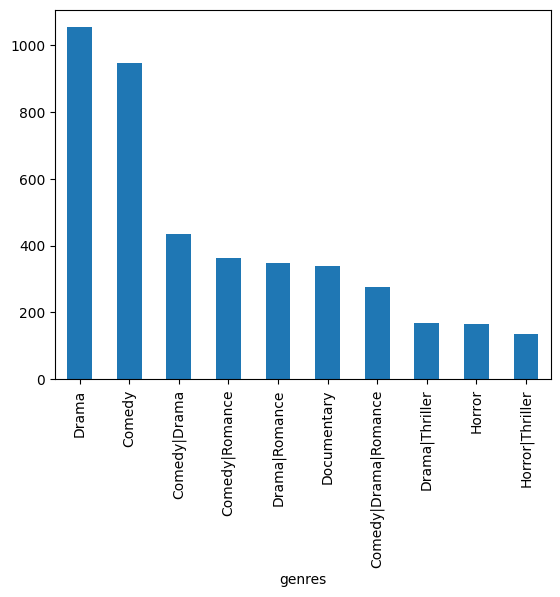

In [5]:
#Data Exploration 3
df_movies["genres"].value_counts().head(10).plot(kind="bar")

Question 1.1: Since the `genres` column is not in the right format for us to do comparisons, create a dummy column for each genre. You can use the `str.get_dummies` method to do this.

In [6]:
df_movies = df_movies.copy()
df_genres = df_movies['genres'].str.get_dummies(sep='|')
df_movies = pd.concat([df_movies, df_genres], axis=1)
df_movies.head()

,movieId,title,genres,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


Questioin 1.2: Validate Question 1.1 updates by displaying the genres list for the movie `Toy Story (1995)` as the reference movie. Hint: Drop the movieId and title column and transpose the data to make it easier to read.

In [7]:
movie_chosen = df_movies.iloc[0]
print(movie_chosen)

movieId                                                         1
title                                            Toy Story (1995)
genres                Adventure|Animation|Children|Comedy|Fantasy
(no genres listed)                                              0
Action                                                          0
Adventure                                                       1
Animation                                                       1
Children                                                        1
Comedy                                                          1
Crime                                                           0
Documentary                                                     0
Drama                                                           0
Fantasy                                                         1
Film-Noir                                                       0
Horror                                                          0
IMAX      

Question 1.3: Create a new `DataFrame` that will store the similarity scores. Hint: Compy df_movies for columns movieId and title.

In [8]:
# I leave genres in here because it helps me look at a quick list and drop it later
df_sim = df_movies.drop(['genres'], axis=1)
df_sim.head()

,movieId,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


Question 2.1: Find all the movies similar to the above movie. The easiest way to do this is by using the `pd.DataFrame.corrwith` method. You can pass `movie_chosen` to this method and specify the correct value for `axis`. The default similarity metric used is Pearson's correlation, so add a new column to the `df_sim` data called `sim_pearson` to store the similarity scores. Show the top 5 rows of the resulting data.

In [9]:
df_sim['sim_pearson'] = df_sim.corrwith(movie_chosen.drop(['movieId','title','genres']), method='pearson', axis=1)
df_sim.head(5)

,movieId,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,sim_pearson
0,1,Toy Story (1995),0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1.000000
1,2,Jumanji (1995),0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.727607
2,3,Grumpier Old Men (1995),0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0.192450
3,4,Waiting to Exhale (1995),0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0.080845
4,5,Father of the Bride Part II (1995),0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.397360


Question 2.2: Pearson's correlation may not be the best similarity metric to use with the data we have, so try [Jaccard similarity](https://en.wikipedia.org/wiki/Jaccard_index) instead. To specify another similarity function, we can use the `method` argument of `corrwith`. Unforetunately, Jaccard similarity is not one of the default metrics offered, but `method` also accepts functions (referred to as a "callable" in the doc).

- Use `corrwith` to find the similarity between `Toy Story (1995)` and other movies, using Jaccard similarity. Add the similarity scores to `df_sim` as a new column calld `sim_jaccard` and show the top 5 rows.

In [10]:
from sklearn.metrics import jaccard_score

df_sim['sim_jaccard'] = df_sim.corrwith(movie_chosen.drop(['movieId','title','genres']), method=jaccard_score, axis=1)
df_sim.head()

,movieId,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,sim_pearson,sim_jaccard
0,1,Toy Story (1995),0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,1.000000,1.000000
1,2,Jumanji (1995),0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0.727607,0.600000
2,3,Grumpier Old Men (1995),0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0.192450,0.166667
3,4,Waiting to Exhale (1995),0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0.080845,0.142857
4,5,Father of the Bride Part II (1995),0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0.397360,0.200000


Question 2.3: Use `corrwith` to find the similarity between `Toy Story (1995)` and other movies, but this time use cosine similarity. Add the similarity scores to `df_sim` as a new column calld `sim_cosine` and show the top 5 rows.

In [11]:
from sklearn.metrics.pairwise import cosine_similarity
df_sim['sim_cosine'] = cosine_similarity(np.reshape(movie_chosen.drop(['movieId','title','genres']), (1,-1)),
                                         df_sim.drop(['movieId', 'title', 'sim_pearson','sim_jaccard'], axis=1))[0]
df_sim.head()

,movieId,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,sim_pearson,sim_jaccard,sim_cosine
0,1,Toy Story (1995),0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,1.000000,1.000000,1.000000
1,2,Jumanji (1995),0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0.727607,0.600000,0.774597
2,3,Grumpier Old Men (1995),0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0.192450,0.166667,0.316228
3,4,Waiting to Exhale (1995),0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0.080845,0.142857,0.258199
4,5,Father of the Bride Part II (1995),0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0.397360,0.200000,0.447214


We built a simple example of a recommender system above. Now let's make this more interesting by adding additional information to the above table that can help us filter the recommendations. Specifically, we want to be able to filter by the movie's popularity (number of users who rated it) and its average rating (average over users). This information is not part of the movie meta-data, so we have to turn to the data with the ratings. This makes it a basic example of a hybrid approach.

The code below will load the data and reshape it from long to wide using `pivot_table`:

In [12]:
df_ratings = pd.read_csv('./ratings.csv')
movie_user_mat = df_ratings.pivot_table(index = 'movieId', columns = 'userId', values = 'rating')
movie_user_mat.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,NaN,NaN,4.0,NaN,4.5,NaN,NaN,NaN,...,4.0,NaN,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.0,NaN,NaN,...,NaN,4.0,NaN,5.0,3.5,NaN,NaN,2.0,NaN,NaN
3,4.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN


Question 3.1: From the table above, extract the average rating of each movie and the number of ratings received by each movie. Add those as two new columns to `df_sim`, and call them `ratings_avg` and `ratings_cnt` respectively. Show the top 5 rows.

In [13]:
df_sim['ratings_avg'] = movie_user_mat.mean(axis=1)
df_sim['ratings_cnt'] = movie_user_mat.count(axis=1)
df_sim.head()

,movieId,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Romance,Sci-Fi,Thriller,War,Western,sim_pearson,sim_jaccard,sim_cosine,ratings_avg,ratings_cnt
0,1,Toy Story (1995),0,0,1,1,1,1,0,0,...,0,0,0,0,0,1.000000,1.000000,1.000000,NaN,NaN
1,2,Jumanji (1995),0,0,1,0,1,0,0,0,...,0,0,0,0,0,0.727607,0.600000,0.774597,3.920930,215.0
2,3,Grumpier Old Men (1995),0,0,0,0,0,1,0,0,...,1,0,0,0,0,0.192450,0.166667,0.316228,3.431818,110.0
3,4,Waiting to Exhale (1995),0,0,0,0,0,1,0,0,...,1,0,0,0,0,0.080845,0.142857,0.258199,3.259615,52.0
4,5,Father of the Bride Part II (1995),0,0,0,0,0,1,0,0,...,0,0,0,0,0,0.397360,0.200000,0.447214,2.357143,7.0


Question 3.2: Now find all the movies that are similar to `Toy Story (1995)` using cosine similarity, just like we did earlier, but this time limit the results to movies in the bottom 40th percentile in terms of popularity (`ratings_cnt`) and the top 40th percentile in terms of average rating (`ratings_avg`). Show the top 5 rows.

In [14]:
less_known = df_sim.query('ratings_cnt < ratings_cnt.quantile(0.4)')
high_rating = df_sim.query('ratings_avg > ratings_avg.quantile(0.6)')
#print(less_known)
#print(high_rating)
#print(df_sim.loc[df_sim['title'] == 'Monsters, Inc. (2001)']) # Monsters Inc. only has 1 rating? Surprising, but it is a small dataset.
df_sin_combine = pd.merge(less_known, high_rating).sort_values('sim_cosine', ascending = False)
df_sin_combine.head()
#df_sim[less_known & high_rating].sort_values('sim_cosine', ascending = False).head()

,movieId,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Romance,Sci-Fi,Thriller,War,Western,sim_pearson,sim_jaccard,sim_cosine,ratings_avg,ratings_cnt
518,65577,"Tale of Despereaux, The (2008)",0,0,1,1,1,1,0,0,...,0,0,0,0,0,1.000000,1.000000,1.000000,4.0,1.0
207,4886,"Monsters, Inc. (2001)",0,0,1,1,1,1,0,0,...,0,0,0,0,0,1.000000,1.000000,1.000000,4.0,1.0
384,26340,"Twelve Tasks of Asterix, The (Les douze travau...",0,1,1,1,1,1,0,0,...,0,0,0,0,0,0.881917,0.833333,0.912871,5.0,1.0
476,51939,TMNT (Teenage Mutant Ninja Turtles) (2007),0,1,1,1,1,1,0,0,...,0,0,0,0,0,0.881917,0.833333,0.912871,4.0,2.0
553,72356,Partly Cloudy (2009),0,0,0,1,1,1,0,0,...,0,0,0,0,0,0.866025,0.800000,0.894427,4.5,1.0


[Bonus] Question 4: In the exercise above, we obtained similarity scores between `Toy Story (1995)` and all other movies. Perfomed all possible pairwise comparisons.

# Q4. This problem takes too long. I crashed the cloud instance. Instead I will just do 10 different movies based on the Ed Discussion thread.

In [17]:
def compare_movies(movie_chosen, df_movies, df_ratings):
  df_sim = df_movies.drop(['genres'], axis=1)
  df_sim['sim_pearson'] = df_sim.corrwith(movie_chosen.drop(['movieId','title','genres']), method='pearson', axis=1)
  df_sim['sim_jaccard'] = df_sim.corrwith(movie_chosen.drop(['movieId','title','genres']), method=jaccard_score, axis=1)
  df_sim['sim_cosine'] = cosine_similarity(np.reshape(movie_chosen.drop(['movieId','title','genres']), (1,-1)),
                                         df_sim.drop(['movieId', 'title', 'sim_pearson','sim_jaccard'], axis=1))[0]
  df_sim['ratings_avg'] = movie_user_mat.mean(axis=1)
  df_sim['ratings_cnt'] = movie_user_mat.count(axis=1)
  less_known = df_sim.query('ratings_cnt < ratings_cnt.quantile(0.4)')
  high_rating = df_sim.query('ratings_avg > ratings_avg.quantile(0.6)')
  df_sin_combine = pd.merge(less_known, high_rating).sort_values('sim_cosine', ascending = False)
  print(df_sin_combine.head())

# Instead do 10 different movies.
movies = []
for i in range(1, 10):
  movie_chosen = df_movies.iloc[i]
  movies.append(movie_chosen.title)
  compare_movies(df_movies.iloc[i], df_movies, df_ratings)

     movieId                                              title  \
1         60                 Indian in the Cupboard, The (1995)   
665   130450                                         Pan (2015)   
425    33681  Adventures of Sharkboy and Lavagirl 3-D, The (...   
447    44399                             Shaggy Dog, The (2006)   
86      2103                                   Tall Tale (1995)   

     (no genres listed)  Action  Adventure  Animation  Children  Comedy  \
1                     0       0          1          0         1       0   
665                   0       0          1          0         1       0   
425                   0       1          1          0         1       0   
447                   0       0          1          0         1       1   
86                    0       0          1          0         1       0   

     Crime  Documentary  ...  Romance  Sci-Fi  Thriller  War  Western  \
1        0            0  ...        0       0         0    0        0   


In [18]:
#from scipy.spatial.distance import pdist, squareform
#sim_mat = # Crashes when using itertools
#print(sim_mat)

Question 5: Create a new text cell in your Notebook: Complete a 50-100 word summary (or short description of your thinking in applying this week's learning to the solution) of your experience in this assignment. Include: What was your incoming experience with this model, if any? what steps you took, what obstacles you encountered. how you link this exercise to real-world, machine learning problem-solving. (What steps were missing? What else do you need to learn?) This summary allows your instructor to know how you are doing and allot points for your effort in thinking and planning, and making connections to real-world work.

In [ ]:
%%shell

jupyter nbconvert --to html /content/Lab08.ipynb